# Date/time-aware timepoint calculate

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

%matplotlib inline

In [3]:
# Generate a range of values every 1 month as in frequency estimation.
pivots = pd.date_range("2016-10-01", "2018-04-01", freq="MS")
pivots

DatetimeIndex(['2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [4]:
# Generate a range of values every 6 months as in the fitness model.
timepoints = pd.date_range("2016-10-01", "2018-04-01", freq="6MS")
timepoints

DatetimeIndex(['2016-10-01', '2017-04-01', '2017-10-01', '2018-04-01'], dtype='datetime64[ns]', freq='6MS')

In [5]:
# Inspect a timepoint
timepoints[0]

Timestamp('2016-10-01 00:00:00', freq='6MS')

In [6]:
# Add one unit of the given frequency to the timepoint.
# This effectively adds 6 months.
timepoints[0] + 1

Timestamp('2017-04-01 00:00:00', freq='6MS')

In [7]:
# This adds two 6-month intervals or 1 year.
timepoints[0] + 2

Timestamp('2017-10-01 00:00:00', freq='6MS')

In [8]:
# This makes no sense.
# timepoints[0] + 0.5

In [9]:
pd.DateOffset(months=12)

<DateOffset: months=12>

In [10]:
timepoints[0]

Timestamp('2016-10-01 00:00:00', freq='6MS')

In [11]:
# Add one year to the first timepoint
timepoints[0] + pd.DateOffset(months=12)

Timestamp('2017-10-01 00:00:00')

In [12]:
# Add three months to the first timepoint
timepoints[0] + pd.DateOffset(months=3)

Timestamp('2017-01-01 00:00:00')

In [13]:
# Extract a single timepoint to inspect it more.
t = timepoints[0]

In [14]:
# Convert an array of timepoints into floats.
[t.year + ((t.month - 1) / 12.0) for t in timepoints]

[2016.75, 2017.25, 2017.75, 2018.25]

In [15]:
t

Timestamp('2018-04-01 00:00:00', freq='6MS')

In [16]:
t.dayofweek

6

In [17]:
t.year

2018

In [18]:
t.month

4

In [19]:
t.ctime()

'Sun Apr  1 00:00:00 2018'

In [20]:
t.freq

<6 * MonthBegins>

In [21]:
t.is_month_start

True

In [22]:
t.is_month_end

False

In [23]:
t.isoformat()

'2018-04-01T00:00:00'

In [24]:
t.nanosecond

0

In [25]:
t.to_datetime64()

numpy.datetime64('2018-04-01T00:00:00.000000000')

In [26]:
t.to_julian_date()

2458209.5

In [27]:
t.to_pydatetime()

datetime.datetime(2018, 4, 1, 0, 0)

In [28]:
timepoints

DatetimeIndex(['2016-10-01', '2017-04-01', '2017-10-01', '2018-04-01'], dtype='datetime64[ns]', freq='6MS')

In [29]:
pivots

DatetimeIndex(['2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', freq='MS')

In [30]:
pivots.shape

(19,)

In [31]:
# Assign values per pivot based on a function.
y = np.arange(0, timepoints.shape[0])
y

array([0, 1, 2, 3])

In [32]:
# Try to define an interpolation between timepoints.
interpolation = interp1d(timepoints, y, kind="linear", bounds_error=True)

In [33]:
# Timepoints cannot be used as inputs to interpolation.
# interpolation(timepoints[1])

In [34]:
# Create a data frame with the given time series and values.
df = pd.DataFrame({"y": y}, index=timepoints)

In [35]:
df["y"].resample("MS").asfreq().interpolate()

2016-10-01    0.000000
2016-11-01    0.166667
2016-12-01    0.333333
2017-01-01    0.500000
2017-02-01    0.666667
2017-03-01    0.833333
2017-04-01    1.000000
2017-05-01    1.166667
2017-06-01    1.333333
2017-07-01    1.500000
2017-08-01    1.666667
2017-09-01    1.833333
2017-10-01    2.000000
2017-11-01    2.166667
2017-12-01    2.333333
2018-01-01    2.500000
2018-02-01    2.666667
2018-03-01    2.833333
2018-04-01    3.000000
Freq: MS, Name: y, dtype: float64

In [36]:
df.asfreq("MS").interpolate("linear")

,y
2016-10-01,0.000000
2016-11-01,0.166667
2016-12-01,0.333333
2017-01-01,0.500000
2017-02-01,0.666667
2017-03-01,0.833333
2017-04-01,1.000000
2017-05-01,1.166667
2017-06-01,1.333333
2017-07-01,1.500000


In [37]:
df["time"] = df.index

In [38]:
df

,y,time
2016-10-01,0,2016-10-01
2017-04-01,1,2017-04-01
2017-10-01,2,2017-10-01
2018-04-01,3,2018-04-01


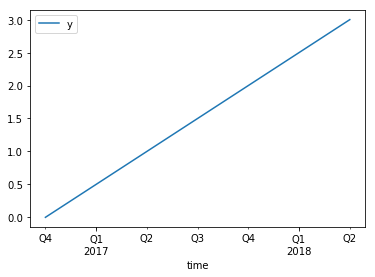

In [39]:
df.plot("time", "y", kind="line")

In [40]:
df.index

DatetimeIndex(['2016-10-01', '2017-04-01', '2017-10-01', '2018-04-01'], dtype='datetime64[ns]', freq='6MS')

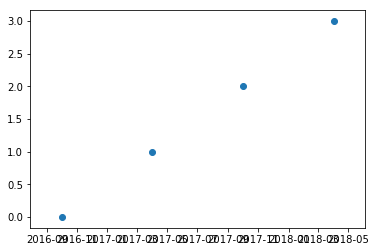

In [41]:
plt.scatter(df.index, df["y"])

In [42]:
new_df = df.drop("time", axis=1).asfreq("MS").interpolate("linear")

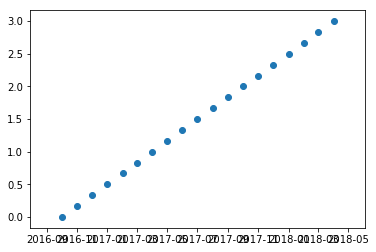

In [43]:
plt.scatter(new_df.index, new_df["y"])

In [44]:
t = 2015.5

In [45]:
year = int(t)
month = int(((t - year) * 12) + 1)
month

7

In [46]:
t1 = pd.Timestamp(year=year, month=month, day=1)

In [47]:
pd.date_range("%s-%s-%s" % (year, month, 1), "%s-%s-%s" % (year + 1, month, 1), freq="1MS")

DatetimeIndex(['2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01', '2016-01-01', '2016-02-01',
               '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
               '2016-07-01'],
              dtype='datetime64[ns]', freq='MS')

In [48]:
def float_to_datestring(time):
    year = int(t)
    month = int(((t - year) * 12) + 1)
    day = 1
    return "-".join(map(str, (year, month, day)))

def timestamp_to_float(time):
    return time.year + ((time.month - 1) / 12.0)

In [49]:
float_to_datestring(2015.5)

'2015-7-1'

In [50]:
d = pd.date_range("2016-10-01", "2018-04-01", freq="6MS")

In [51]:
d

DatetimeIndex(['2016-10-01', '2017-04-01', '2017-10-01', '2018-04-01'], dtype='datetime64[ns]', freq='6MS')

In [52]:
s = d.to_series().resample("MS")

In [53]:
s.interpolate()

2016-10-01   2016-10-01
2016-11-01          NaT
2016-12-01          NaT
2017-01-01          NaT
2017-02-01          NaT
2017-03-01          NaT
2017-04-01   2017-04-01
2017-05-01          NaT
2017-06-01          NaT
2017-07-01          NaT
2017-08-01          NaT
2017-09-01          NaT
2017-10-01   2017-10-01
2017-11-01          NaT
2017-12-01          NaT
2018-01-01          NaT
2018-02-01          NaT
2018-03-01          NaT
2018-04-01   2018-04-01
Freq: MS, dtype: datetime64[ns]

In [54]:
d.to_series().asfreq("MS")

2016-10-01   2016-10-01
2016-11-01          NaT
2016-12-01          NaT
2017-01-01          NaT
2017-02-01          NaT
2017-03-01          NaT
2017-04-01   2017-04-01
2017-05-01          NaT
2017-06-01          NaT
2017-07-01          NaT
2017-08-01          NaT
2017-09-01          NaT
2017-10-01   2017-10-01
2017-11-01          NaT
2017-12-01          NaT
2018-01-01          NaT
2018-02-01          NaT
2018-03-01          NaT
2018-04-01   2018-04-01
Freq: MS, dtype: datetime64[ns]

In [55]:
d.to_series().asfreq("MS")

2016-10-01   2016-10-01
2016-11-01          NaT
2016-12-01          NaT
2017-01-01          NaT
2017-02-01          NaT
2017-03-01          NaT
2017-04-01   2017-04-01
2017-05-01          NaT
2017-06-01          NaT
2017-07-01          NaT
2017-08-01          NaT
2017-09-01          NaT
2017-10-01   2017-10-01
2017-11-01          NaT
2017-12-01          NaT
2018-01-01          NaT
2018-02-01          NaT
2018-03-01          NaT
2018-04-01   2018-04-01
Freq: MS, dtype: datetime64[ns]

In [56]:
delta_t = pd.DateOffset(months=12)

## k-fold time series cross-validation logic

Work out logic for [k-fold time series cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-of-time-series-data) using realistic timepoints and delta values.

In [68]:
# Define time to project into the future from any given timepoint.
delta_time = pd.DateOffset(months=12)
delta_time

<DateOffset: months=12>

In [73]:
# Define timepoints to project into the future from.
timepoints = pd.date_range("2014-10-01", "2018-04-01", freq="6MS")
timepoints

DatetimeIndex(['2014-10-01', '2015-04-01', '2015-10-01', '2016-04-01',
               '2016-10-01', '2017-04-01', '2017-10-01', '2018-04-01'],
              dtype='datetime64[ns]', freq='6MS')

In [83]:
# Find all timepoints we could possibly project into the future from.
# This is determined by the delta time and date of the last timepoint.
valid_timepoint_indexes = np.where((timepoints + delta_time) <= timepoints[-1])[0]
valid_timepoint_indexes

array([0, 1, 2, 3, 4, 5])

In [84]:
timepoints[valid_timepoint_indexes]

DatetimeIndex(['2014-10-01', '2015-04-01', '2015-10-01', '2016-04-01',
               '2016-10-01', '2017-04-01'],
              dtype='datetime64[ns]', freq=None)

In [88]:
# Split valid timepoint index values into all possible train/test sets.
train_test_splits = []

for i in range(len(valid_timepoint_indexes) - 1):
    train_test_splits.append([valid_timepoint_indexes[:i + 1], np.array([valid_timepoint_indexes[i + 1]])])

train_test_splits

[[array([0]), array([1])],
 [array([0, 1]), array([2])],
 [array([0, 1, 2]), array([3])],
 [array([0, 1, 2, 3]), array([4])],
 [array([0, 1, 2, 3, 4]), array([5])]]

In [94]:
# Inspect train/test sets by the timepoints they represent.
for train, test in train_test_splits:
    print("train: %s,\ntest: %s\n\n" % (timepoints[train], timepoints[test]))

train: DatetimeIndex(['2014-10-01'], dtype='datetime64[ns]', freq=None),
test: DatetimeIndex(['2015-04-01'], dtype='datetime64[ns]', freq=None)


train: DatetimeIndex(['2014-10-01', '2015-04-01'], dtype='datetime64[ns]', freq=None),
test: DatetimeIndex(['2015-10-01'], dtype='datetime64[ns]', freq=None)


train: DatetimeIndex(['2014-10-01', '2015-04-01', '2015-10-01'], dtype='datetime64[ns]', freq=None),
test: DatetimeIndex(['2016-04-01'], dtype='datetime64[ns]', freq=None)


train: DatetimeIndex(['2014-10-01', '2015-04-01', '2015-10-01', '2016-04-01'], dtype='datetime64[ns]', freq=None),
test: DatetimeIndex(['2016-10-01'], dtype='datetime64[ns]', freq=None)


train: DatetimeIndex(['2014-10-01', '2015-04-01', '2015-10-01', '2016-04-01',
               '2016-10-01'],
              dtype='datetime64[ns]', freq=None),
test: DatetimeIndex(['2017-04-01'], dtype='datetime64[ns]', freq=None)


